### Trading using the Black-Scholes Model

In the world of finance, the [Black-Scholes-Merton model] stands out as a pivotal tool for pricing options. Let's create the Black Scholes model in Python. Developed through rigorous mathematical derivations, this model calculates the theoretical value of an option based on five essential parameters:

1.  **Underlying Price (S)**: The current market price of the asset.
2.  **Strike Price (K)**: The predetermined price at which the option can be exercised.
3.  **Time to Expiration (T)**: The time left (in years) until the option's expiration date.
4.  **Risk Free Rate (r)**: The constant rate of return on a risk-free asset, such as a government bond.
5.  **Volatility (σ)**: A measure of how much the price of the underlying asset fluctuates.

#### Solving the Black-Scholes Equation Yields
$$C = S_t \Phi(d_1) - Ke^{-rt} \Phi(d_2)$$

$$\Phi(x) = \int_{-\infty}^x \frac{1}{\sqrt{2\pi}}e^{\frac{-s^2}{2}}ds$$

$$d_1 = \frac{ln(\frac{S_t}{K})+(r+\frac{\sigma^2}{2})t}{\sigma \sqrt{t}}$$

$$d_2 = d_1 - \sigma \sqrt{t}$$

$$\frac{dS_t}{S_t} = \mu dt + \sigma dW_t$$

In [2]:
!pip install qfin

In [4]:
# Now, let's implement the Black-Scholes-Merton model in Python.

import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt
# You'll need to install qfin if you haven't already: pip install qfin
import qfin as qf

# --- Black-Scholes Option Pricing Function (for both Call and Put) ---
def black_scholes_merton(S, K, T, r, sigma, option_type='call'):
    
 
    if option_type not in ['call', 'put']:
        raise ValueError("option_type must be 'call' or 'put'")

    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)

    N_d1 = norm.cdf(d1)
    N_d2 = norm.cdf(d2)

    if option_type == 'put':
        N_minus_d1 = norm.cdf(-d1)
        N_minus_d2 = norm.cdf(-d2)

    if option_type == 'call':
        option_price = S * N_d1 - K * np.exp(-r * T) * N_d2
    else:  # option_type == 'put'
        option_price = K * np.exp(-r * T) * N_minus_d2 - S * N_minus_d1

    return option_price

# This function is specifically for a call option, matching your second snippet
def black_scholes_call(S, K, sigma, r, t):
    d1 = (np.log(S/K) + (r + ((sigma**2)/2))*t) / (sigma * np.sqrt(t))
    d2 = d1 - (sigma * np.sqrt(t))
    C = S * norm.cdf(d1) - K * np.exp(-r*t) * norm.cdf(d2)
    return C

In [5]:
# --- Example Usage of Black-Scholes-Merton ---

# Parameters for our example option
S_example = 100         # Underlying Price (e.g., stock price)
K_example = 100         # Strike Price
T_example = 1           # Time to Expiration (1 year)
r_example = 0.05        # Risk-Free Rate (5%)
sigma_example = 0.20    # Volatility (20%)

print(f"--- Black-Scholes-Merton Option Pricing ---")
print(f"Underlying Price (S): {S_example}")
print(f"Strike Price (K): {K_example}")
print(f"Time to Expiration (T): {T_example} years")
print(f"Risk-Free Rate (r): {r_example*100}%")
print(f"Volatility (sigma): {sigma_example*100}%")
print("-" * 40)

# Calculate Call Option Price
call_price = black_scholes_merton(S_example, K_example, T_example, r_example, sigma_example, option_type='call')
print(f"Theoretical Call Option Price: ${call_price:.2f}")

# Calculate Put Option Price
put_price = black_scholes_merton(S_example, K_example, T_example, r_example, sigma_example, option_type='put')
print(f"Theoretical Put Option Price: ${put_price:.2f}")

# Another example: Out-of-the-money call option
S_otm_call = 95
K_otm_call = 100
T_otm_call = 0.5
r_otm_call = 0.03
sigma_otm_call = 0.25

print("\n--- Example: Out-of-the-Money Call Option ---")
print(f"Underlying Price (S): {S_otm_call}")
print(f"Strike Price (K): {K_otm_call}")
print(f"Time to Expiration (T): {T_otm_call} years")
print(f"Risk-Free Rate (r): {r_otm_call*100}%")
print(f"Volatility (sigma): {sigma_otm_call*100}%")
otm_call_price = black_scholes_merton(S_otm_call, K_otm_call, T_otm_call, r_otm_call, sigma_otm_call, option_type='call')
print(f"Theoretical Out-of-the-Money Call Option Price: ${otm_call_price:.2f}")

# Another example: In-the-money put option
S_itm_put = 110
K_itm_put = 100
T_itm_put = 0.25
r_itm_put = 0.04
sigma_itm_put = 0.18

print("\n--- Example: In-the-Money Put Option ---")
print(f"Underlying Price (S): {S_itm_put}")
print(f"Strike Price (K): {K_itm_put}")
print(f"Time to Expiration (T): {T_itm_put} years")
print(f"Risk-Free Rate (r): {r_itm_put*100}%")
print(f"Volatility (sigma): {sigma_itm_put*100}%")
itm_put_price = black_scholes_merton(S_itm_put, K_itm_put, T_itm_put, r_itm_put, sigma_itm_put, option_type='put')
print(f"Theoretical In-the-Money Put Option Price: ${itm_put_price:.2f}")

--- Black-Scholes-Merton Option Pricing ---
Underlying Price (S): 100
Strike Price (K): 100
Time to Expiration (T): 1 years
Risk-Free Rate (r): 5.0%
Volatility (sigma): 20.0%
----------------------------------------
Theoretical Call Option Price: $10.45
Theoretical Put Option Price: $5.57

--- Example: Out-of-the-Money Call Option ---
Underlying Price (S): 95
Strike Price (K): 100
Time to Expiration (T): 0.5 years
Risk-Free Rate (r): 3.0%
Volatility (sigma): 25.0%
Theoretical Out-of-the-Money Call Option Price: $5.20

--- Example: In-the-Money Put Option ---
Underlying Price (S): 110
Strike Price (K): 100
Time to Expiration (T): 0.25 years
Risk-Free Rate (r): 4.0%
Volatility (sigma): 18.0%
Theoretical In-the-Money Put Option Price: $0.56



--- Simulating Option Payoff and P/L ---


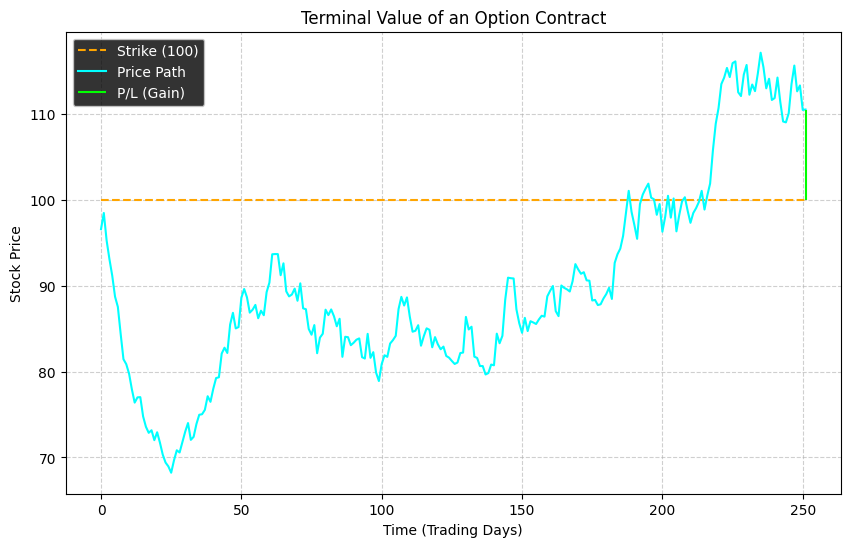

Premium at t=0 (calculated by model): 14.23
P/L (for this simulated path): -3.67


In [6]:
print("\n--- Simulating Option Payoff and P/L ---")

# Simulate dynamics of the underlying according to Geometric Brownian Motion
# Using the simpler black_scholes_call function parameters for consistency with plotting
S_gbm = 100
K_gbm = 100
sigma_gbm = 0.3
r_gbm = 0.05
t_gbm = 1 # 1 year

path = qf.simulations.GeometricBrownianMotion(S_gbm, r_gbm, sigma_gbm, 1/252, t_gbm) # dt = 1/252 for daily steps over 1 year (approx 252 trading days)

# Create a chart of the price path and the strike price
plt.figure(figsize=(10, 6))
plt.title("Terminal Value of an Option Contract")
plt.hlines(K_gbm, 0, len(path.simulated_path) - 1, label=f'Strike ({K_gbm})', color='orange', linestyle='--')
plt.plot(path.simulated_path, label='Price Path', color='cyan')
final_price = path.simulated_path[-1]

# Calculate P/L for the single path
payoff = max(final_price - K_gbm, 0)
if payoff == 0:
    plt.vlines(len(path.simulated_path) - 1, final_price, K_gbm, color='red', label="P/L (Loss/No Gain)")
else:
    plt.vlines(len(path.simulated_path) - 1, K_gbm, final_price, color='lime', label="P/L (Gain)")

plt.style.use('dark_background')
plt.xlabel('Time (Trading Days)')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

# Print the premium and the resulting P/L for the single simulation
calculated_premium = black_scholes_call(S_gbm, K_gbm, sigma_gbm, r_gbm, t_gbm)
print(f"Premium at t=0 (calculated by model): {calculated_premium:.2f}")
print(f"P/L (for this simulated path): {payoff - calculated_premium:.2f}")


--- Trading Edge Analysis ---
Call Price (from model): 14.23
Market Maker Quote (Ask): 14.10
Trade Edge (Model Price - Market Ask): 0.13

--- Monte Carlo Simulation of P/L (Neutral Drift) ---
Mean P/L over 100000 simulations (Neutral Drift): 91.85

--- Monte Carlo Simulation of P/L (Negative Drift Scenario) ---


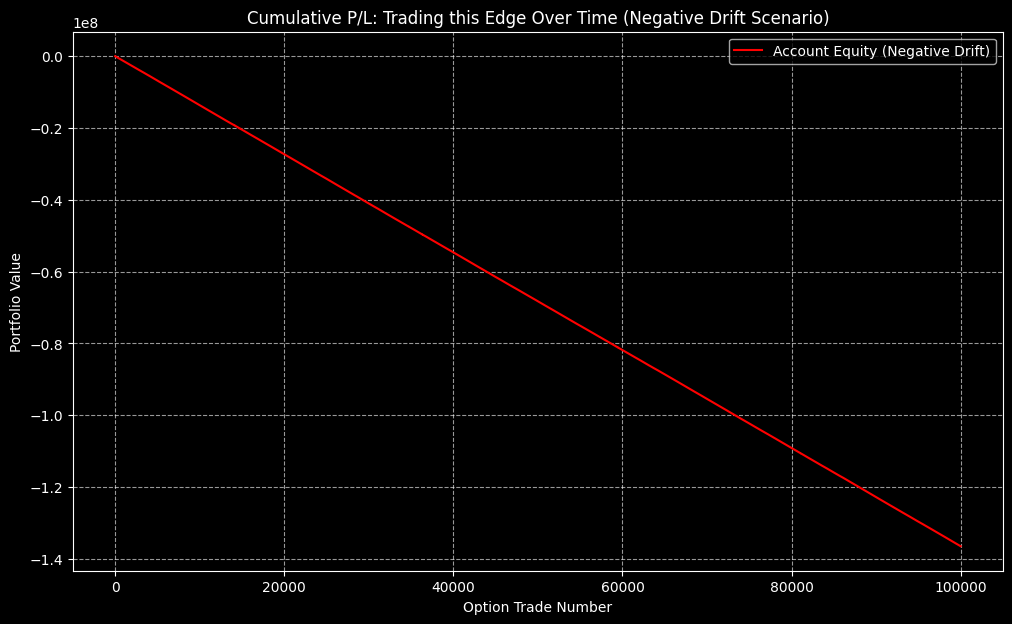

Mean P/L over 100000 simulations (Negative Drift): -1364.73


In [7]:
print("\n--- Trading Edge Analysis ---")
print(f"Call Price (from model): {calculated_premium:.2f}")
market_maker_ask = 14.10 # Assuming this is the ask price from the market maker
print(f"Market Maker Quote (Ask): {market_maker_ask:.2f}")
trade_edge = calculated_premium - market_maker_ask
print(f"Trade Edge (Model Price - Market Ask): {trade_edge:.2f}")

# --- Monte Carlo Simulation for P/L over many trades (Neutral Drift) ---
print("\n--- Monte Carlo Simulation of P/L (Neutral Drift) ---")
# Using the market maker's quote as the premium for a large number of trades
premium_per_option = 14.10
num_options = 100 # Assuming buying 100 options per trade as in your original snippet
total_premium_paid = premium_per_option * num_options
pls_neutral_drift = []

num_simulations = 100000
for _ in range(num_simulations):
    # Simulate a new path with the original parameters
    path_sim = qf.simulations.GeometricBrownianMotion(S_gbm, r_gbm, sigma_gbm, 1/252, t_gbm)
    # Calculate the payoff for 100 options
    payoff_sim = max(path_sim.simulated_path[-1] - K_gbm, 0) * num_options
    # Calculate P/L for this single trade
    pls_neutral_drift.append(payoff_sim - total_premium_paid)

mean_pl_neutral_drift = np.mean(pls_neutral_drift)
print(f"Mean P/L over {num_simulations} simulations (Neutral Drift): {mean_pl_neutral_drift:.2f}")

# --- Monte Carlo Simulation for P/L over many trades (Negative Drift Scenario) ---
print("\n--- Monte Carlo Simulation of P/L (Negative Drift Scenario) ---")
# The original snippet had a mu (drift) of -0.5, representing a scenario where the asset is expected to decline
# This is typically used to illustrate what happens if your assumptions about drift are wrong,
# or if you are simulating a bear market scenario.
pls_negative_drift = []

for _ in range(num_simulations):
    # Simulate a new path with a negative drift
    path_neg_drift = qf.simulations.GeometricBrownianMotion(S_gbm, -0.5, sigma_gbm, 1/252, t_gbm)
    payoff_neg_drift = max(path_neg_drift.simulated_path[-1] - K_gbm, 0) * num_options
    pls_negative_drift.append(payoff_neg_drift - total_premium_paid)

plt.figure(figsize=(12, 7))
plt.title("Cumulative P/L: Trading this Edge Over Time (Negative Drift Scenario)")
plt.plot(np.cumsum(pls_negative_drift), label="Account Equity (Negative Drift)", color='red')
plt.style.use('dark_background')
plt.xlabel('Option Trade Number')
plt.ylabel('Portfolio Value')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.show()

mean_pl_negative_drift = np.mean(pls_negative_drift)
print(f"Mean P/L over {num_simulations} simulations (Negative Drift): {mean_pl_negative_drift:.2f}")